# 疫情定会过去，春天终将到来~
本文基于jupyter_notbook及一系列python扩展包，对国内疫情和全球疫情分析统计，数据来源于约翰霍普金斯大学系统科学与工程中心的 COVID-19 疫情数
据。本文从国内与国外两个方面进行分析，包括疫情地图、统计描述和分析（不包含建模与预测）。

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pyecharts
import matplotlib.pyplot as plt
from IPython.display import display
from random import randint
from mpl_toolkits.mplot3d import Axes3D
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

In [31]:
#解决中文字体乱码问题
#SimHei
mpl.rc("font",family='SimHei')
#导入色彩
colors=['#FFFFFF'	,'#DDDDDD'	,'#AAAAAA'	,'#888888'	,'#666666'	,'#444444'	,'#000000'	,'#FFB7DD'	,'#FF88C2'	,'#FF44AA'	,'#FF0088'	,'#C10066'	,'#A20055'	,'#8C0044'	,'#FFCCCC'	,'#FF8888'	,'#FF3333'	,'#FF0000'	,'#CC0000'	,'#AA0000'	,'#880000'	,'#FFC8B4'	,'#FFA488'	,'#FF7744'	,'#FF5511'	,'#E63F00'	,'#C63300'	,'#A42D00'	,'#FFDDAA'	,'#FFBB66'	,'#FFAA33'	,'#FF8800'	,'#EE7700'	,'#CC6600'	,'#BB5500'	,'#FFEE99'	,'#FFDD55'	,'#FFCC22'	,'#FFBB00'	,'#DDAA00'	,'#AA7700'	,'#886600'	,'#FFFFBB'	,'#FFFF77'	,'#FFFF33'	,'#FFFF00'	,'#EEEE00'	,'#BBBB00'	,'#888800'	,'#EEFFBB'	,'#DDFF77'	,'#CCFF33'	,'#BBFF00'	,'#99DD00'	,'#88AA00'	,'#668800'	,'#CCFF99'	,'#BBFF66'	,'#99FF33'	,'#77FF00'	,'#66DD00'	,'#55AA00'	,'#227700'	,'#99FF99'	,'#66FF66'	,'#33FF33'	,'#00FF00'	,'#00DD00'	,'#00AA00'	,'#008800'	,'#BBFFEE'	,'#77FFCC'	,'#33FFAA'	,'#00FF99'	,'#00DD77'	,'#00AA55'	,'#008844'	,'#AAFFEE'	,'#77FFEE'	,'#33FFDD'	,'#00FFCC'	,'#00DDAA'	,'#00AA88'	,'#008866'	,'#99FFFF'	,'#66FFFF'	,'#33FFFF'	,'#00FFFF'	,'#00DDDD'	,'#00AAAA'	,'#008888'	,'#CCEEFF'	,'#77DDFF'	,'#33CCFF'	,'#00BBFF'	,'#009FCC'	,'#0088A8'	,'#007799'	,'#CCDDFF'	,'#99BBFF'	,'#5599FF'	,'#0066FF'	,'#0044BB'	,'#003C9D'	,'#003377'	,'#CCCCFF'	,'#9999FF'	,'#5555FF'	,'#0000FF'	,'#0000CC'	,'#0000AA'	,'#000088'	,'#CCBBFF'	,'#9F88FF'	,'#7744FF'	,'#5500FF'	,'#4400CC'	,'#2200AA'	,'#220088'	,'#D1BBFF'	,'#B088FF'	,'#9955FF'	,'#7700FF'	,'#5500DD'	,'#4400B3'	,'#3A0088'	,'#E8CCFF'	,'#D28EFF'	,'#B94FFF'	,'#9900FF'	,'#7700BB'	,'#66009D'	,'#550088'	,'#F0BBFF'	,'#E38EFF'	,'#E93EFF'	,'#CC00FF'	,'#A500CC'	,'#7A0099'	,'#660077'	,'#FFB3FF'	,'#FF77FF'	,'#FF3EFF'	,'#FF00FF'	,'#CC00CC'	,'#990099'	,'#770077']

In [4]:
#导入数据
AreaDatas=pd.read_csv('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv')
GlobalConfirm=pd.read_csv('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalConfirm.csv')
GlobalDeath=pd.read_csv('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalDeath.csv')
GlobalRecovered=pd.read_csv('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalRecovered.csv')

# 国内部分

## 总体情况

In [5]:
#从四张表中挑选出中国数据
China=AreaDatas.loc[AreaDatas['countryName']=='中国']
ChinaConfirm=GlobalConfirm.loc[GlobalConfirm['Country/Region']=='China']
ChinaDeath=GlobalDeath.loc[GlobalDeath['Country/Region']=='China']
ChinaRecovered=GlobalRecovered.loc[GlobalRecovered['Country/Region']=='China']

In [6]:
#删除China表中的中国汇总数据
China_null=China.drop(China[China.provinceName == '中国' ].index)

In [41]:
#中国新冠疫情累积确诊、治愈及死亡人数
from pyecharts.charts import Bar

bar = Bar()
bar.add_xaxis(['总确诊数','总治愈数','总死亡数'])
bar.add_yaxis("", [83817,77745,4636])
bar.set_global_opts(title_opts=opts.TitleOpts(title="中国新冠疫情累积确诊、治愈及死亡人数", subtitle="（截止至4-20）"))
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
bar.render_notebook()

    从条形图中可以看出，总确诊数为八万多例，而治愈数达到七万多例，治愈率达到90%以上，与世界其他地区相比要高很多。

In [9]:
#总确诊、治愈及死亡人数时间变化
China_count=China.loc[China.provinceName == '中国']

In [12]:
from pyecharts.charts import Pie,Map,Line,Grid
from pyecharts import options as opts

FileRecovered=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalRecovered.csv', 'r')
lines_recovered=FileRecovered.readlines()
lines_recovered.pop(0)

recovered=[]

for i in range(4,94,1):
    valueRecovered=0
    for line in lines_recovered:
        lineMessage=line.split(',')
        if  lineMessage[1]=='China':
            valueRecovered+=int(lineMessage[i])
    recovered.append(valueRecovered)

death=[]

FileDeath=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalDeath.csv', 'r')
lines_death=FileDeath.readlines()
lines_death.pop(0)
for i in range(4,94,1):
    valueDeath=0
    for line in lines_death:
        lineMessage=line.split(',')
        if  lineMessage[1]=='China':
            valueDeath+=int(lineMessage[i])
    death.append(valueDeath)

netSum=[]
for i in range(len(sum)):
    netSum.append(sum[i]-recovered[i]-death[i])


(
    Line(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add_xaxis(
        xaxis_data=times
    )
    .add_yaxis(
        series_name="总确诊数",
        is_smooth=True,
        symbol="emptyCircle",
        is_symbol_show=False,
        # xaxis_index=1,
        color="#D81E06",
        y_axis=sum,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=2),
    )
    .add_yaxis(
        series_name="总治愈数",
        is_smooth=True,
        symbol="emptyCircle",
        is_symbol_show=False,
        # xaxis_index=1,
        color="#1AFA29",
        y_axis=recovered,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=2),
    )
    .add_yaxis(
        series_name="总死亡数",
        is_smooth=True,
        symbol="emptyCircle",
        is_symbol_show=False,
        # xaxis_index=1,
        color="#0D5DDF",
        y_axis=death,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=2),
    )
      
    .set_global_opts(
        legend_opts=opts.LegendOpts(),
        tooltip_opts=opts.TooltipOpts(trigger="none", axis_pointer_type="cross"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
            axisline_opts=opts.AxisLineOpts(
                is_on_zero=False, linestyle_opts=opts.LineStyleOpts()
            ),
            axispointer_opts=opts.AxisPointerOpts(
                is_show=True, label=opts.LabelOpts()
            ),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        ),
    )
    .render_notebook()
)


    从时间线上来看，疫情呈上升趋势，总确诊人数曲线在一月到二月明显陡峭上升，这段时间也是疫情最为严重的阶段，从三月份开始，由于防护力度加大确诊人数开始下降，呈缓慢上升趋势；治愈人数也随之变化，从图中可以看出，确诊数与治愈数的差距在二月最为显著，三月份开始治愈人数增加，二者差距缩小。

In [ ]:
#中国疫情地图分析

## 各省疫情分析

In [11]:
#各省疫情分析
from pyecharts.charts import Bar
from pyecharts import options as opts

#挑选出中国各省累计人数
Global_ProvinceConfirmed=GlobalConfirm[['Country/Region','Province/State','4/20/20']]
Global_ProvinceRecovered=GlobalRecovered[['Country/Region','Province/State','4/20/20']]
Global_ProvinceDeath=GlobalDeath[['Country/Region','Province/State','4/20/20']]
#print(Global_ProvinceRecovered)
China_ProvinceConfirmed=Global_ProvinceConfirmed.loc[Global_ProvinceConfirmed['Country/Region'] == 'China']
China_ProvinceRecovered=Global_ProvinceRecovered.loc[Global_ProvinceRecovered['Country/Region'] == 'China']
China_ProvinceDeath=Global_ProvinceDeath.loc[Global_ProvinceDeath['Country/Region'] == 'China']
#print(China_ProvinceRecovered)
China_ProvinceConfirmed.drop(['Country/Region'], axis=1, inplace=True)
China_ProvinceRecovered.drop(['Country/Region'], axis=1, inplace=True)
China_ProvinceDeath.drop(['Country/Region'], axis=1, inplace=True)
#print(China_ProvinceRecovered)



E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
#省份
cate=['安徽','北京','重庆','福建','甘肃','广东','广西','贵州','海南','河北','黑龙江','河南','香港' ,'湖北','湖南','内蒙古','江苏','江西','吉林','辽宁','澳门','宁夏','青海','陕西','山东','上海','山西','四川','天津','西藏','新疆','云南','浙江']
#累计确诊人数
data1=[991,	593,	579,	355,	139,	1581,	254,	147,	168,	328,	905,	1276,	1025,	68128,	1019,	194,	653,	937,	104,	146,	45,	75,	18,	256,	787,	638,	197,	561,	189,	1,	76,	184,	1268]
#累计治愈人数
data2=[984,	514,	570,	339,	137,	1494,	252,	145,	162,	317,	472,	1254,	630,	63511,	1015,	104,	643,	936,	97,	143,	22,	75,	18,	252,	765,	530,	135,	554,	174,	1,	73,	178,	1249]
#累计死亡人数
data3=[6,	8,	6,	1,	2,	8,	2,	2,	6,	6,	13,	22,	4,	4512,	4,	1,	0,	1,	1,	2,	0,	0,	0,	3,	7,	7,	0,	3,	3,	0,	3,	2,	1]


In [14]:
# 各省累计确诊人数
bar = Bar()
bar.add_xaxis(cate)
bar.add_yaxis('', data1,color="#0D5DDF")
bar.set_global_opts(title_opts=opts.TitleOpts(title="各省累计确诊人数", subtitle="（截止至4-20）"))
bar.render_notebook()

In [16]:
# 各省累计治愈人数
bar = Bar()
bar.add_xaxis(cate)
bar.add_yaxis('', data2,color="#1AFA29")
bar.set_global_opts(title_opts=opts.TitleOpts(title="各省累计治愈人数", subtitle="（截止至4-20）"))
bar.render_notebook()

In [15]:
# 各省累计死亡人数
bar = Bar()
bar.add_xaxis(cate)
bar.add_yaxis('', data3)
bar.set_global_opts(title_opts=opts.TitleOpts(title="各省累计死亡人数", subtitle="（截止至4-20）"))
bar.render_notebook()

    从上面三张图中可以看出，湖北作为疫情最为严重的地方，各项数据都十分严峻，并且远超于其他各省份。

In [118]:
China_ProvinceConfirmed.rename(columns={'Province/State':'省份', '4/20/20':'截止4-20'}, inplace = True)
#按照疫情累计人数排名各省情况
print(China_ProvinceConfirmed.sort_values(by='截止4-20',ascending=False))

                省份  截止4-20
62           Hubei   68128
54       Guangdong    1581
60           Henan    1276
81        Zhejiang    1268
61       Hong Kong    1025
63           Hunan    1019
49           Anhui     991
66         Jiangxi     937
59    Heilongjiang     905
73        Shandong     787
65         Jiangsu     653
74        Shanghai     638
50         Beijing     593
51       Chongqing     579
76         Sichuan     561
52          Fujian     355
58           Hebei     328
72         Shaanxi     256
55         Guangxi     254
75          Shanxi     197
64  Inner Mongolia     194
77         Tianjin     189
80          Yunnan     184
57          Hainan     168
56         Guizhou     147
68        Liaoning     146
53           Gansu     139
67           Jilin     104
79        Xinjiang      76
70         Ningxia      75
69           Macau      45
71         Qinghai      18
78           Tibet       1


E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


    从具体数据来看，前五名为湖北、广东、河南、浙江、湖南（以省为单位，未包含香港特别行政区），除湖北以外，其他各省份确诊都在2000以下，广东次之，广东作为全国经济中心之一，企业众多，人口众多，人流量十分密集，而河南也是全国人口大省之一，确诊数达到了1276。

# 湖北

In [13]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline

hubeiDict={
    '武汉':'武汉市','孝感':'孝感市','黄冈':'黄冈市',
    '荆州':'荆州市','鄂州':'鄂州市','随州':'随州市',
    '襄阳':'襄阳市','黄石':'黄石市','宜昌':'宜昌市',
    '咸宁':'咸宁市','十堰':'十堰市','仙桃':'仙桃市',
    '天门':'天门市','恩施州':'恩施土家族苗族自治州',
    '潜江':'潜江市','神农架林区':'神农架林区','荆门':'荆门市'
}

pieces = [
    {'max': 1, 'label': '0', 'color': '#FFECEC'},
    {'min': 1, 'max': 50, 'label': '1-50', 'color': '#FFB5B5'},
    {'min': 50, 'max': 100, 'label': '50-100', 'color': '#FF7575'},
    {'min': 100, 'max': 500, 'label': '100-500', 'color': '#FF2D2D'},
    {'min': 500, 'max': 1000, 'label': '500-1000', 'color': '#FF0000'},
    {'min': 1000, 'max': 5000, 'label': '1000-5000', 'color': '#930000'},
    {'min': 1000, 'label': '5000+', 'color': '#4D0000'},
]



FileArea=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv','r',encoding='utf-8')
lines=FileArea.readlines()

line_cities=[]

for line in lines:
    lineMessage=line.split(',')
    if lineMessage[4]=='湖北省':
        line_cities.append(line)

tl = Timeline()
tl.add_schema(is_auto_play=True,symbol_size=4)

for i in range(1,5,1):
    for j in range(1,32,1):
        if((i==1 and j<24) or (i==2 and j==31) or (i==4 and j>22)):
            continue
        cities=[]
        values=[]
        for line in line_cities:
            lineMessage=line.split(',')
            month=int(lineMessage[11].split(' ')[0].split('-')[1])
            day=int(lineMessage[11].split(' ')[0].split('-')[2])
            if(month==i and day==j):
                if(lineMessage[12] != '' and lineMessage[12] != '未知地区'
                        and lineMessage[12] != '待明确地区'
                        and lineMessage[12] != '监狱系统'):
                    if(hubeiDict[lineMessage[12]] not in cities):
                        cities.append(hubeiDict[lineMessage[12]])
                        values.append(int(lineMessage[15]))

        if not values:
            continue


        map=Map(init_opts=opts.InitOpts(width="800px", height="500px"))
        # noinspection PyTypeChecker
        map.add(
                series_name="",
                maptype="湖北",
                data_pair=zip(cities,values),
                is_map_symbol_show=False,
                )
        map.set_global_opts(
                visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces, pos_left='50px'),
                tooltip_opts=opts.TooltipOpts(
                trigger="item", formatter="{b}<br/>{c}"),
            )
        map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        tl.add(map, "{}".format('2020-' + str(i)+'-' + str(j)))

tl.render_notebook()


In [150]:
#湖北省各市各项数据统计
HubeiProvince = China_null[(China_null[u'provinceName']=='湖北省') & (China_null[u'updateTime']=='2020-04-22 09:32:33') ]
HubeiConfirmedCount=HubeiProvince[['provinceName','cityName','city_confirmedCount','city_curedCount','city_deadCount']] 
#增加一列治愈率（治愈数/确诊数）
HubeiConfirmedCount['CureRate']=HubeiConfirmedCount['city_curedCount'] / HubeiConfirmedCount['city_confirmedCount']
HubeiConfirmedCount.rename(columns={'provinceName':'省份', 'cityName':'城市', 'city_confirmedCount':'总确诊数', 'city_curedCount':'总治愈数', 'city_deadCount':'总死亡数','CureRate':'治愈率'}, inplace = True)

print(HubeiConfirmedCount)

      省份     城市     总确诊数     总治愈数    总死亡数       治愈率
234  湖北省     武汉  50333.0  46367.0  3869.0  0.921205
235  湖北省     孝感   3518.0   3389.0   129.0  0.963331
236  湖北省     黄冈   2907.0   2782.0   125.0  0.957000
237  湖北省     荆州   1580.0   1528.0    52.0  0.967089
238  湖北省     鄂州   1394.0   1335.0    59.0  0.957676
239  湖北省     随州   1307.0   1262.0    45.0  0.965570
240  湖北省     襄阳   1175.0   1135.0    40.0  0.965957
241  湖北省     黄石   1015.0    976.0    39.0  0.961576
242  湖北省     宜昌    931.0    894.0    37.0  0.960258
243  湖北省     荆门    928.0    887.0    41.0  0.955819
244  湖北省     咸宁    836.0    821.0    15.0  0.982057
245  湖北省     十堰    672.0    664.0     8.0  0.988095
246  湖北省     仙桃    575.0    553.0    22.0  0.961739
247  湖北省     天门    496.0    481.0    15.0  0.969758
248  湖北省    恩施州    252.0    245.0     7.0  0.972222
249  湖北省     潜江    198.0    189.0     9.0  0.954545
250  湖北省  神农架林区     11.0     11.0     0.0  1.000000


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


    湖北省各市情况如上表所展示，武汉作为交通枢纽是最为严重的地区，确诊人数超过一万，其他地市由于距离武汉近，感染几率更高，特别是临近的孝感和黄冈两市。但由于疫情发现早、治疗早，湖北省总体治愈率很高，都超过90%。

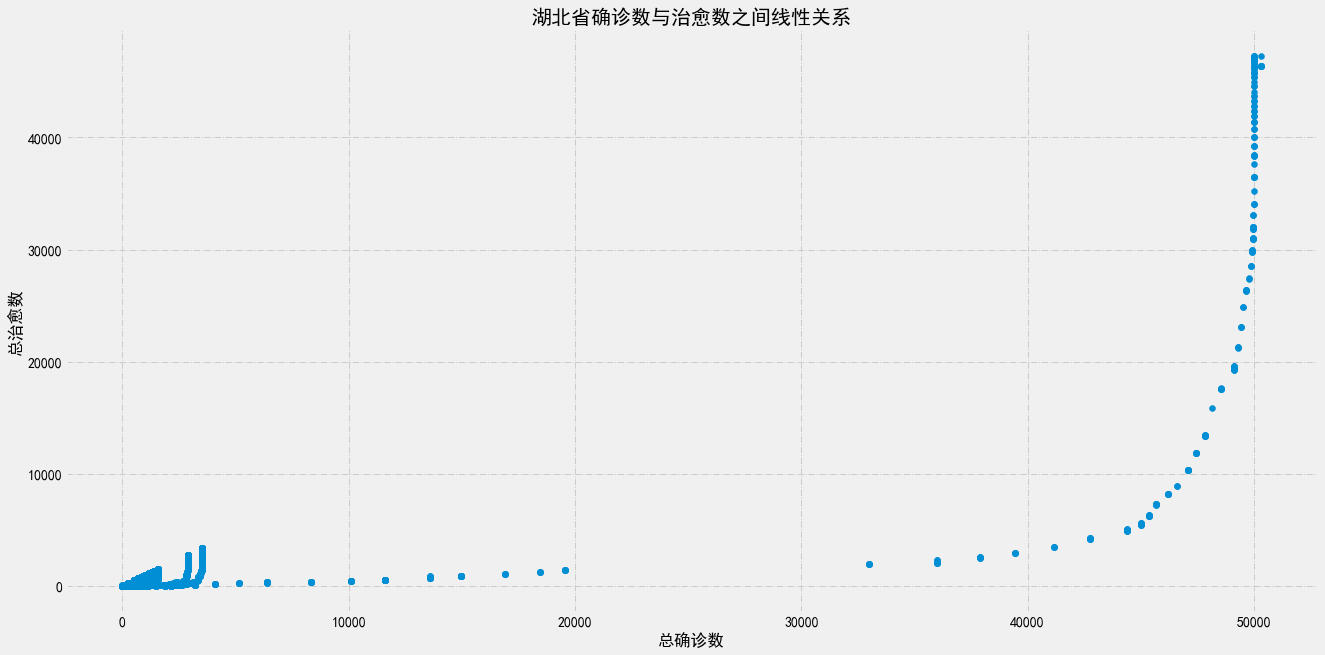

In [27]:
#确诊与治愈之间的关系
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.faker import Faker

HubeiProvinceTime = China_null[(China_null[u'provinceName']=='湖北省') ]
Hubei=HubeiProvinceTime[['provinceName','cityName','city_confirmedCount','city_curedCount','city_deadCount']]
#print(Hubei)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.scatter(Hubei['city_confirmedCount'],Hubei['city_curedCount'])
plt.xlabel('总确诊数')
plt.ylabel('总治愈数')
plt.title('湖北省确诊数与治愈数之间线性关系',fontsize=20)
plt.grid(linestyle = "-.")
plt.show()


    从确诊数和治愈数散点图来看，随着确诊人数增加，治愈数也在增加，特别是在后半段时期，湖北省采取多项措施隔断疫情传染源，建立雷神山火神山医院，有效遏制了病情传播。

# 广东、河南、浙江、湖南疫情地图

## 广东

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline

GuangdongDict={
    '广州':'广州市','深圳':'深圳市','佛山':'佛山市',
    '揭阳':'揭阳市','珠海':'珠海市','中山':'中山市',
    '湛江':'湛江市','肇庆':'肇庆市','梅州':'梅州市',
    '潮州':'潮州市','河源':'河源市','东莞':'东莞市',
    '惠州':'惠州市','汕头':'汕头市',
    '江门':'江门市','阳江':'阳江市','茂名':'茂名市',
    '清远':'清远市','韶关':'韶关市','汕尾':'汕尾市','河源市':'河源市',
}

pieces = [
    {'max': 1, 'label': '0', 'color': '	#C4E1E1'},
    {'min': 1, 'max': 10, 'label': '1-10', 'color': '	#A3D1D1'},
    {'min': 10, 'max': 20, 'label': '10-20', 'color': '	#4F9D9D'},
    {'min': 20, 'max': 50, 'label': '20-50', 'color': '#984B4B'},
    {'min': 50, 'max': 100, 'label': '50-100', 'color': '#804040'},
    {'min': 100, 'max': 200, 'label': '100-200', 'color': '#743A3A'},
    {'min': 200, 'label': '200+', 'color': '#613030'},
]



FileArea=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv','r',encoding='utf-8')
lines=FileArea.readlines()

line_cities=[]

for line in lines:
    lineMessage=line.split(',')
    if lineMessage[4]=='广东省':
        line_cities.append(line)
        #print(line)


tl = Timeline()
tl.add_schema(is_auto_play=True,symbol_size=4)

for i in range(1,5,1):
    for j in range(1,32,1):
        if((i==1 and j<24) or (i==2 and j==31) or (i==4 and j>22)):
            continue
        cities=[]
        values=[]
        for line in line_cities:
            lineMessage=line.split(',')
            month=int(lineMessage[11].split(' ')[0].split('-')[1])
            day=int(lineMessage[11].split(' ')[0].split('-')[2])
            if(month==i and day==j):
                if(lineMessage[12] != '' and lineMessage[12] != '未知'
                        and lineMessage[12] != '未明确地区'
                        and lineMessage[12] != '监狱系统' and lineMessage[12] != '外地来穗人员'
                        and lineMessage[12] != '外地来粤人员'
                        and lineMessage[12] != '待明确地区'
                        and lineMessage[12] != '未知地区'):
                    if(GuangdongDict[lineMessage[12]] not in cities):
                        cities.append(GuangdongDict[lineMessage[12]])
                        values.append(int(lineMessage[15]))

        if not values:
            continue

        map=Map(init_opts=opts.InitOpts(width="800px", height="500px"))
        # noinspection PyTypeChecker
        map.add(
                series_name="",
                maptype="广东",
                data_pair=zip(cities,values),
                is_map_symbol_show=False,
                )
        map.set_global_opts(
                visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces, pos_left='50px'),
                tooltip_opts=opts.TooltipOpts(
                trigger="item", formatter="{b}<br/>{c}"),
            )
        map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

        tl.add(map, "{}".format('2020-' + str(i)+'-' + str(j)))

tl.render_notebook()

## 河南

In [17]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline

GuangdongDict={
    '信阳':'信阳市','郑州':'郑州市','南阳':'南阳市',
    '驻马店':'驻马店市','商丘（含永城）':'商丘市','周口':'周口市',
    '平顶山':'平顶山市','新乡':'新乡市','安阳':'安阳市',
    '许昌':'许昌市','漯河':'漯河市','焦作':'焦作市',
    '洛阳':'洛阳市','开封':'开封市',
    '鹤壁':'鹤壁市','濮阳':'濮阳市','三门峡':'三门峡市',
    '济源':'济源市','巩义':'巩义市','安阳市':'安阳市','漯河市':'漯河市',
    '鹤壁市':'鹤壁市','商丘':'商丘市','安阳（含滑县）':'安阳市',
    '新乡（含长垣）':'新乡市'
}

pieces = [
    {'max': 1, 'label': '0', 'color': '	#C4E1E1'},
    {'min': 1, 'max': 10, 'label': '1-10', 'color': '	#A3D1D1'},
    {'min': 10, 'max': 20, 'label': '10-20', 'color': '	#4F9D9D'},
    {'min': 20, 'max': 50, 'label': '20-50', 'color': '#984B4B'},
    {'min': 50, 'max': 100, 'label': '50-100', 'color': '#804040'},
    {'min': 100, 'max': 200, 'label': '100-200', 'color': '#743A3A'},
    {'min': 200, 'label': '200+', 'color': '#613030'},
]



FileArea=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv','r',encoding='utf-8')
lines=FileArea.readlines()

line_cities=[]

for line in lines:
    lineMessage=line.split(',')
    if lineMessage[4]=='河南省':
        line_cities.append(line)
       # print(line)

tl = Timeline()
tl.add_schema(is_auto_play=True,symbol_size=4)

for i in range(1,5,1):
    for j in range(1,32,1):
        if((i==1 and j<24) or (i==2 and j==31) or (i==4 and j>22)):
            continue
        cities=[]
        values=[]
        for line in line_cities:
            lineMessage=line.split(',')
            month=int(lineMessage[11].split(' ')[0].split('-')[1])
            day=int(lineMessage[11].split(' ')[0].split('-')[2])
            if(month==i and day==j):
                if(lineMessage[12] != '' and lineMessage[12] != '固始县'
                        and lineMessage[12] != '未明确地区'
                        and lineMessage[12] != '境外输入'
                        and lineMessage[12] != '待明确地区'
                        and lineMessage[12] != '滑县'
                        and lineMessage[12] != '未知地区'
                        and lineMessage[12] != '长垣县'
                        and lineMessage[12] != '长垣'
                        and lineMessage[12] != '邓州'
                        and lineMessage[12] != '南阳（含邓州）'
                        and lineMessage[12] != '永城'
                        and lineMessage[12] != '境外输入人员'
                ):
                    if(GuangdongDict[lineMessage[12]] not in cities):
                        cities.append(GuangdongDict[lineMessage[12]])
                        values.append(int(lineMessage[15]))

        if not values:
            continue

        map=Map(init_opts=opts.InitOpts(width="800px", height="500px"))
        # noinspection PyTypeChecker
        map.add(
            series_name="",
            maptype="河南",
            data_pair=zip(cities,values),
            is_map_symbol_show=False,
            )
        map.set_global_opts(
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces, pos_left='50px'),
            tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}<br/>{c}"),
        )
        map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        
        tl.add(map, "{}".format('2020-'+str(i)+'-'+str(j)))

tl.render_notebook()

## 浙江

In [18]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline

GuangdongDict={
    '温州':'温州市','杭州':'杭州市','宁波':'宁波市',
    '台州':'台州市','金华':'金华市','嘉兴':'嘉兴市',
    '绍兴':'绍兴市','丽水':'丽水市','衢州':'衢州市',
    '湖州':'湖州市','舟山':'舟山市'
}

pieces = [
    {'max': 1, 'label': '0', 'color': '	#C4E1E1'},
    {'min': 1, 'max': 10, 'label': '1-10', 'color': '	#A3D1D1'},
    {'min': 10, 'max': 20, 'label': '10-20', 'color': '	#4F9D9D'},
    {'min': 20, 'max': 50, 'label': '20-50', 'color': '#984B4B'},
    {'min': 50, 'max': 100, 'label': '50-100', 'color': '#804040'},
    {'min': 100, 'max': 200, 'label': '100-200', 'color': '#743A3A'},
    {'min': 200, 'label': '200+', 'color': '#613030'},
]



FileArea=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv','r',encoding='utf-8')
lines=FileArea.readlines()

line_cities=[]

for line in lines:
    lineMessage=line.split(',')
    if lineMessage[4]=='浙江省':
        line_cities.append(line)
        #print(line)

tl = Timeline()
tl.add_schema(is_auto_play=True,symbol_size=4)

for i in range(1,5,1):
    for j in range(1,32,1):
        if((i==1 and j<24) or (i==2 and j==31) or (i==4 and j>22)):
            continue
        cities=[]
        values=[]
        for line in line_cities:
            lineMessage=line.split(',')
            month=int(lineMessage[11].split(' ')[0].split('-')[1])
            day=int(lineMessage[11].split(' ')[0].split('-')[2])
            if(month==i and day==j):
                if(lineMessage[12] != '' and lineMessage[12] != '待明确地区'
                        and lineMessage[12] != '未明确地区'
                        and lineMessage[12] != '境外输入人员'
                        and lineMessage[12] != '境外输入'
                        and lineMessage[12] != '省十里丰监狱'
                        and lineMessage[12] != '未知地区'):
                    if(GuangdongDict[lineMessage[12]] not in cities):
                        cities.append(GuangdongDict[lineMessage[12]])
                        values.append(int(lineMessage[15]))
        if not values:
            continue
        # noinspection PyTypeChecker

        map=Map(init_opts=opts.InitOpts(width="800px", height="500px"))
        map.add(
                series_name="",
                maptype="浙江",
                data_pair=zip(cities,values),
                is_map_symbol_show=False,
                )
        map.set_global_opts(
                visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces, pos_left='50px'),
                tooltip_opts=opts.TooltipOpts(
                trigger="item", formatter="{b}<br/>{c}"),
            )
        map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       
        tl.add(map, "{}".format('2020-' + str(i) +'-'+ str(j)))

tl.render_notebook()

## 湖南

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Map, Timeline

GuangdongDict={
    '长沙':'长沙市','岳阳':'岳阳市','邵阳':'邵阳市',
    '常德':'常德市','株洲':'株洲市','娄底':'娄底市',
    '益阳':'益阳市','衡阳':'衡阳市','永州':'永州市',
    '怀化':'怀化市','郴州':'郴州市','湘潭':'湘潭市',
    '湘西自治州':'湘西土家族苗族自治州','张家界':'张家界市'
}

pieces = [
    {'max': 1, 'label': '0', 'color': '	#C4E1E1'},
    {'min': 1, 'max': 10, 'label': '1-10', 'color': '	#A3D1D1'},
    {'min': 10, 'max': 20, 'label': '10-20', 'color': '	#4F9D9D'},
    {'min': 20, 'max': 50, 'label': '20-50', 'color': '#984B4B'},
    {'min': 50, 'max': 100, 'label': '50-100', 'color': '#804040'},
    {'min': 100, 'max': 200, 'label': '100-200', 'color': '#743A3A'},
    {'min': 200, 'label': '200+', 'color': '#613030'},
]



FileArea=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\AreaDatas.csv','r',encoding='utf-8')
lines=FileArea.readlines()

line_cities=[]

for line in lines:
    lineMessage=line.split(',')
    if lineMessage[4]=='湖南省':
        line_cities.append(line)
        #print(line)

tl = Timeline()
tl.add_schema(is_auto_play=True,symbol_size=4)


for i in range(1,5,1):
    for j in range(1,32,1):
        if((i==1 and j<24) or (i==2 and j==31) or (i==4 and j>22)):
            continue
        cities=[]
        values=[]
        for line in line_cities:
            lineMessage=line.split(',')
            month=int(lineMessage[11].split(' ')[0].split('-')[1])
            day=int(lineMessage[11].split(' ')[0].split('-')[2])
            if(month==i and day==j):
                if(lineMessage[12] != '' and lineMessage[12] != '未知'
                        and lineMessage[12] != '未明确地区'
                        and lineMessage[12] != '监狱系统'
                        and lineMessage[12] != '境外输入'
                        and lineMessage[12] != '待明确地区'
                        and lineMessage[12] != '未知地区'):
                    if(GuangdongDict[lineMessage[12]] not in cities):
                        cities.append(GuangdongDict[lineMessage[12]])
                        values.append(int(lineMessage[15]))
        if not values:
            continue


        map=Map(init_opts=opts.InitOpts(width="800px", height="500px"))
        # noinspection PyTypeChecker
        map.add(
                series_name="",
                maptype="湖南",
                data_pair=zip(cities,values),
                is_map_symbol_show=False,
                )
        map.set_global_opts(
                visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces, pos_left='50px'),
                tooltip_opts=opts.TooltipOpts(
                trigger="item", formatter="{b}<br/>{c}"),
            )
        map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        
        tl.add(map, "{}".format('2020-' + str(i) +'-'+ str(j)))

tl.render_notebook()

# 世界疫情

## 确诊

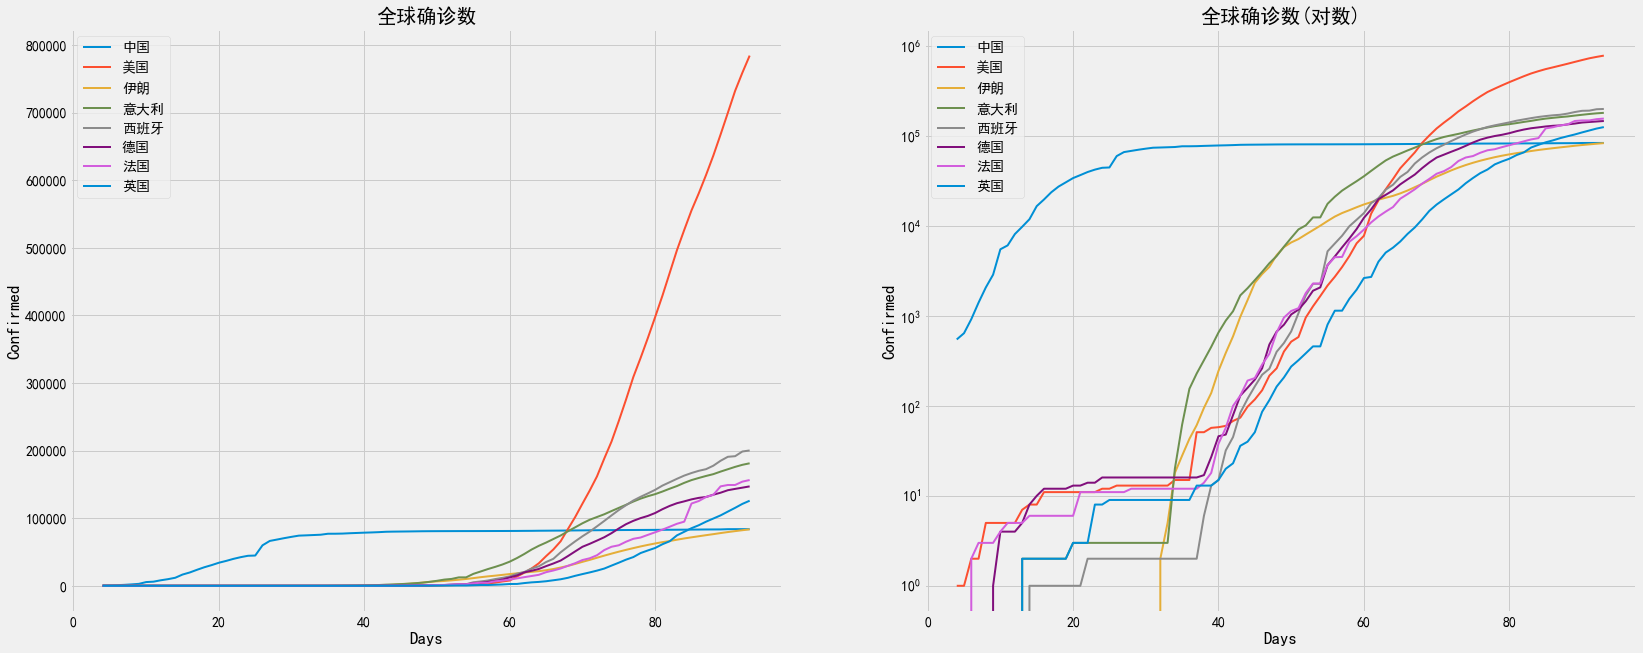

In [23]:
# coding:utf-8
import math


FileConfirmed=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalConfirm.csv', 'r')
lines=FileConfirmed.readlines()

head=lines[0].split(',') # index0为省份，1为国家地区，2为纬度，3为经度，后面的都是日期M/D/Y
lines.pop(0)

XChina=[]
YChina=[]
XAmecria=[]
YAmecria=[]
XIran=[]
YIran=[]
XItaly=[]
YItaly=[]
XSpain=[]
YSpain=[]
XGermany=[]
YGermany=[]
XFrance=[]
YFrance=[]
XUK=[]
YUK=[]


for i in range(4,94,1):
    temptime=head[i].split('/')
    time='2020-'+temptime[0]+'-'+temptime[1]
    XChina.append(i)
    XAmecria.append(i)
    XIran.append(i)
    XItaly.append(i)
    XSpain.append(i)
    XGermany.append(i)
    XFrance.append(i)
    XUK.append(i)
    valueChina=0
    valueFrance=0
    valueUK=0
    for line in lines:
        lineMessage=line.split(',')
        if  lineMessage[1]=='China':
            valueChina+=int(lineMessage[i])
        if lineMessage[1]=='US':
            YAmecria.append(int(lineMessage[i]))
        if lineMessage[1] == 'Iran':
            YIran.append(int(lineMessage[i]))
        if lineMessage[1] == 'Italy':
            YItaly.append(int(lineMessage[i]))
        if lineMessage[1] == 'Spain':
            YSpain.append(int(lineMessage[i]))
        if lineMessage[1] == 'Germany':
            YGermany.append(int(lineMessage[i]))
        if lineMessage[1] == 'France':
            valueFrance += int(lineMessage[i])
        if lineMessage[1] == 'United Kingdom':
            valueUK += int(lineMessage[i])

    YChina.append(valueChina)
    YFrance.append(valueFrance)
    YUK.append(valueUK)

x=np.arange(0,100)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
plt.subplot(121)#设置为1张图

plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2,color='#D25DDD')
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球确诊数')
plt.xlabel('Days')
plt.ylabel('Confirmed')
plt.legend()

plt.subplot(122)#设置为1张图

plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2,color='#D25DDD')
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球确诊数(对数)')
plt.xlabel('Days')
plt.ylabel('Confirmed')
plt.legend()
plt.semilogy()
plt.show()



    全球确诊曲线图和对数曲线图可以更加清晰的反映出增长趋势。 
    从中可以看出，中国在15~20天左右意识到危机的严重性，开始采取措施， 因此接下来到30天的增长趋势趋于缓和，直到疫情爆发的40天开始，基本不再进行增长，防疫工作初步取得成效。其他国家均在30天左右出现疫情，并以惊人的增长率发展，直到60~80天左右才趋向于缓和， 目前世界疫情发展形势仍不乐观，但已经逐渐趋于可控。

## 死亡

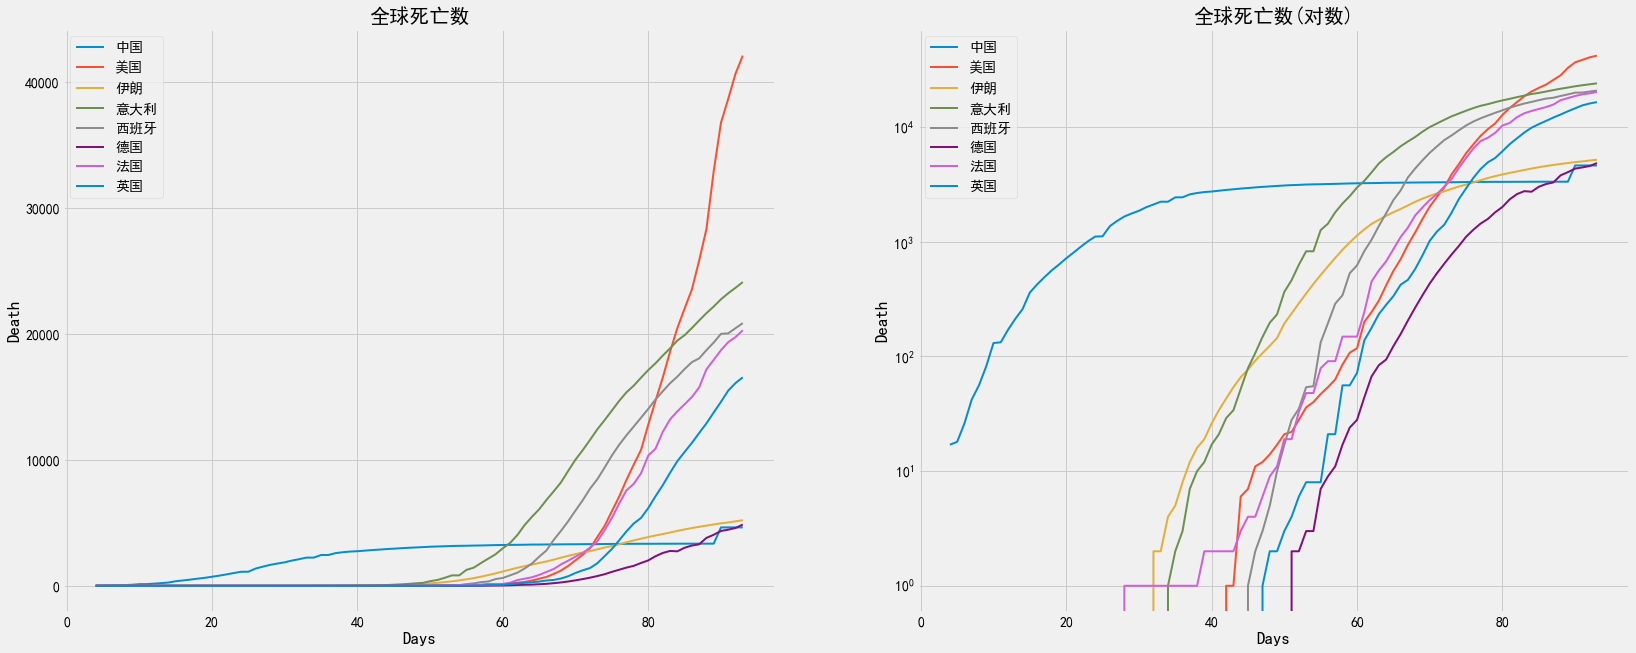

In [24]:
# coding:utf-8


FileConfirmed=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalDeath.csv', 'r')
lines=FileConfirmed.readlines()

head=lines[0].split(',') # index0为省份，1为国家地区，2为纬度，3为经度，后面的都是日期M/D/Y
lines.pop(0)

XChina=[]
YChina=[]
XAmecria=[]
YAmecria=[]
XIran=[]
YIran=[]
XItaly=[]
YItaly=[]
XSpain=[]
YSpain=[]
XGermany=[]
YGermany=[]
XFrance=[]
YFrance=[]
XUK=[]
YUK=[]


for i in range(4,94,1):
    temptime=head[i].split('/')
    time='2020-'+temptime[0]+'-'+temptime[1]
    XChina.append(i)
    XAmecria.append(i)
    XIran.append(i)
    XItaly.append(i)
    XSpain.append(i)
    XGermany.append(i)
    XFrance.append(i)
    XUK.append(i)
    valueChina=0
    valueFrance=0
    valueUK=0
    for line in lines:
        lineMessage=line.split(',')
        if  lineMessage[1]=='China':
            valueChina+=int(lineMessage[i])
        if lineMessage[1]=='US':
            YAmecria.append(int(lineMessage[i]))
        if lineMessage[1] == 'Iran':
            YIran.append(int(lineMessage[i]))
        if lineMessage[1] == 'Italy':
            YItaly.append(int(lineMessage[i]))
        if lineMessage[1] == 'Spain':
            YSpain.append(int(lineMessage[i]))
        if lineMessage[1] == 'Germany':
            YGermany.append(int(lineMessage[i]))
        if lineMessage[1] == 'France':
            valueFrance += int(lineMessage[i])
        if lineMessage[1] == 'United Kingdom':
            valueUK += int(lineMessage[i])

    YChina.append(valueChina)
    YFrance.append(valueFrance)
    YUK.append(valueUK)

x=np.arange(0,100)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
plt.subplot(121)#设置为1张图
plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2,color='#D25DDD')
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球死亡数')
plt.xlabel('Days')
plt.ylabel('Death')
plt.legend()


plt.subplot(122)#设置为1张图
plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2,color='#D25DDD')
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球死亡数(对数)')
plt.xlabel('Days')
plt.ylabel('Death')
plt.legend()
plt.semilogy()
plt.show()


     死亡数是衡量一个国家医疗水平和对本次疫情关注程度的一个重要指标。中国疫情中的死亡率大概在5.5%左右上下波动， 而历史上，在医学极不发达的中世纪，黑死病的死亡率是10%左右， 可见本次疫情的严重性和新冠病毒的危险性。国内疫情主要控制在湖北及附近地区， 因此其他地区有能力也有精力支援重疫区。同时，我国基础医疗体系相对完善， 因此在国际上我国死亡率处于较低水平。
    而国际形式便没有国内如此乐观，美国死亡率在5.5%左右，英国13.5%，意大利13.3%， 西班牙在10%左右。总体上看，全球死亡率基本在5%~15%的区间内波动。
    数据分析中可以看出，美国虽然初期采取了相当宽松的政策，且确诊人数相当之多， 但是由于其本身医疗水平极高，且工业门类齐全，虽然国内大量物资告急， 但是总体上基本保持稳定。
    其他国家的情况就不甚乐观，国家领土小，物资紧缺，缺少医生和护士资源， 在全球情况不利的情境下很难维持现有医疗水平，因此死亡率较高。 且英国为首的国家采取的集体免疫策略也将他们的国民拖进了深渊。

## 治愈

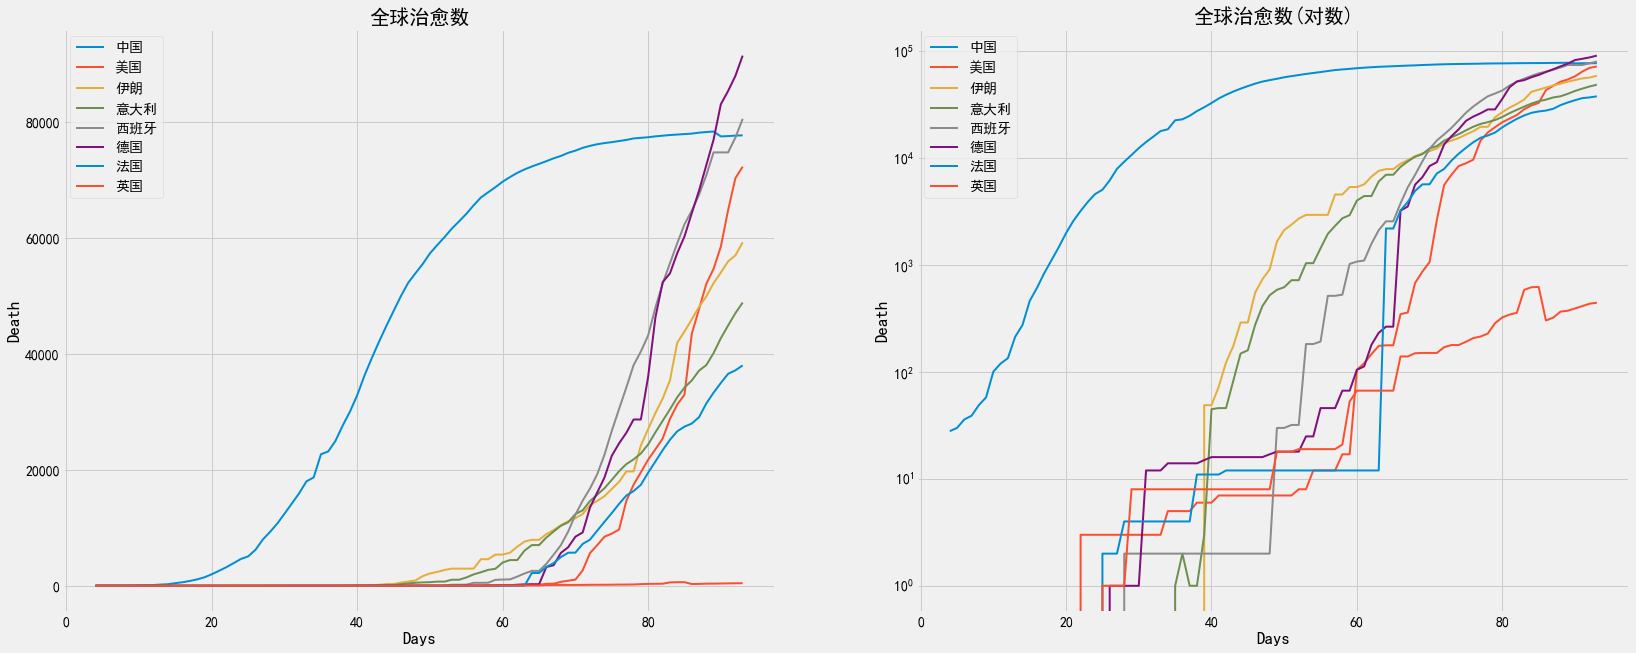

In [25]:
# coding:utf-8


FileConfirmed=open('E:\\Python\\python_code\\study_coding\\19_COVID-19\\GlobalRecovered.csv', 'r')
lines=FileConfirmed.readlines()

head=lines[0].split(',') # index0为省份，1为国家地区，2为纬度，3为经度，后面的都是日期M/D/Y
lines.pop(0)

XChina=[]
YChina=[]
XAmecria=[]
YAmecria=[]
XIran=[]
YIran=[]
XItaly=[]
YItaly=[]
XSpain=[]
YSpain=[]
XGermany=[]
YGermany=[]
XFrance=[]
YFrance=[]
XUK=[]
YUK=[]


for i in range(4,94,1):
    temptime=head[i].split('/')
    time='2020-'+temptime[0]+'-'+temptime[1]
    XChina.append(i)
    XAmecria.append(i)
    XIran.append(i)
    XItaly.append(i)
    XSpain.append(i)
    XGermany.append(i)
    XFrance.append(i)
    XUK.append(i)
    valueChina=0
    valueFrance=0
    valueUK=0
    for line in lines:
        lineMessage=line.split(',')
        if  lineMessage[1]=='China':
            valueChina+=int(lineMessage[i])
        if lineMessage[1]=='US':
            YAmecria.append(int(lineMessage[i]))
        if lineMessage[1] == 'Iran':
            YIran.append(int(lineMessage[i]))
        if lineMessage[1] == 'Italy':
            YItaly.append(int(lineMessage[i]))
        if lineMessage[1] == 'Spain':
            YSpain.append(int(lineMessage[i]))
        if lineMessage[1] == 'Germany':
            YGermany.append(int(lineMessage[i]))
        if lineMessage[1] == 'France':
            valueFrance += int(lineMessage[i])
        if lineMessage[1] == 'United Kingdom':
            valueUK += int(lineMessage[i])

    YChina.append(valueChina)
    YFrance.append(valueFrance)
    YUK.append(valueUK)

x=np.arange(0,100)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))
plt.subplot(121)#设置为1张图
plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2)
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球治愈数')
plt.xlabel('Days')
plt.ylabel('Death')
plt.legend()


plt.subplot(122)#设置为1张图
plt.plot(XChina,YChina,label='中国',linewidth=2)
plt.plot(XAmecria,YAmecria,label='美国',linewidth=2)
plt.plot(XIran,YIran,label='伊朗',linewidth=2)
plt.plot(XItaly,YItaly,label='意大利',linewidth=2)
plt.plot(XSpain,YSpain,label='西班牙',linewidth=2)
plt.plot(XGermany,YGermany,label='德国',linewidth=2)
plt.plot(XFrance,YFrance,label='法国',linewidth=2)
plt.plot(XUK,YUK,label='英国',linewidth=2)


plt.title('全球治愈数(对数)')
plt.xlabel('Days')
plt.ylabel('Death')
plt.legend()
plt.semilogy()
plt.show()


    前期，中国并没有有效的治疗手段和医疗措施，因此并没有康复患者。 在疫情发展到前中期时，防疫工作以及临床研究获得进展， 大量患者在经历了最艰难的时间后开始出现爆发式的康复，在接近现在时间的节点， 我国防疫工作已取得阶段突性破性的成功。
    而在国外，在中国疫情刚开始的时候就有大量的国际组织对其展开研究， 从疫苗研发到治疗方法都有取得进展，因此在外国疫情爆发的同时， 治疗工作也已经开展，其中医疗水平较为先进的德国增速康复增速最快。 然而英国在受到脱欧带来的经济影响下，又实行集体免疫策略，且其自身医疗水平良莠不齐， 因此虽然英国疫情一直在增长，但是并没有有效的治疗手段，接下来国际社会应该更加关注英国的疫情发展。

## 中美对比

In [38]:
x=[1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43843,53736,65778,83836,101657,121465,140909,161831,188172,213372,243762,275586,308853,337072,366667,397505,429052,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,759086,784326]
y=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,5,5,5,5,6,6,6,7,7,7,7,7,7,7,7,7,7,7,8,8,12,12,12,12,17,17,105,121,147,176,178,178,348,361,681,869,1072,2665,5644,7024,8474,9001,9707,14652,17448,19581,21763,23559,25410,28790,31270,32988,43482,47763,52096,54703,58545,64840,70337,72329]
z=[0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	6,	7,	11,	12,	14,	17,	21,	22,	28,	36,	40,	47,	54,	63,	85,	108,	118,	200,	244,	307,	417,	557,	706,	942,	1209,	1581,	2026,	2467,	2978,	3873,	4757,	5926,	7087,	8407,	9619,	10783,	12794,	14695,	16544,	18586,	20462,	22019,	23528,	25831,	28325,	32916,	36773,	38664,	40661,	42094]
ChinaConfirmSum= [548,	643,	920,	1406,	2075,	2877,	5509,	6087,	8141,	9802,	11891,	16630,	19716,	23707,	27440,	30587,	34110,	36814,	39829,	42354,	44386,	44759,	59895,	66358,	68413,	70513,	72434,	74211,	74619,	75077,	75550,	77001,	77022,	77241,	77754,	78166,	78600,	78928,	79356,	79932,	80136,	80261,	80386,	80537,	80690,	80770,	80823,	80860,	80887,	80921,	80932,	80945,	80977,	81003,	81033,	81058,	81102,	81156,	81250,	81305,	81435,	81498,	81591,	81661,	81782,	81897,	81999,	82122,	82198,	82279,	82361,	82432,	82511,	82543,	82602,	82665,	82718,	82809,	82883,	82941,	83014,	83134,	83213,	83306,	83356,	83403,	83760,	83787,	83805,	83817]
ChinaRecoveredSum=[28,	30,	36,	39,	49,	58,	101,	120,	135,	214,	275,	463,	614,	843,	1115,	1477,	1999,	2596,	3219,	3918,	4636,	5082,	6217,	7977,	9298,	10755,	12462,	14206,	15962,	18014,	18704,	22699,	23187,	25015,	27676,	30084,	32930,	36329,	39320,	42162,	44854,	47450,	50001,	52292,	53944,	55539,	57388,	58804,	60181,	61644,	62901,	64196,	65660,	67017,	67910,	68798,	69755,	70535,	71266,	71857,	72362,	72814,	73280,	73773,	74181,	74720,	75100,	75582,	75923,	76206,	76405,	76565,	76760,	76946,	77207,	77310,	77410,	77567,	77679,	77791,	77877,	77956,	78039,	78200,	78311,	78401,	77552,	77614,	77690,	77745]
ChinaDeathSum=[17,	18,	26,	42,	56,	82,	131,	133,	171,	213,	259,	361,	425,	491,	563,	633,	718,	805,	905,	1012,	1112,	1117,	1369,	1521,	1663,	1766,	1864,	2003,	2116,	2238,	2238,	2443,	2445,	2595,	2665,	2717,	2746,	2790,	2837,	2872,	2914,	2947,	2983,	3015,	3044,	3072,	3100,	3123,	3139,	3161,	3172,	3180,	3193,	3203,	3217,	3230,	3241,	3249,	3253,	3259,	3274,	3274,	3281,	3285,	3291,	3296,	3299,	3304,	3308,	3309,	3316,	3322,	3326,	3330,	3333,	3335,	3335,	3337,	3339,	3340,	3343,	3343,	3345,	3345,	3346,	3346,	4636,	4636,	4636,	4636]
time=pd.date_range('1/22/2020','4/20/2020')

from pandas.core.frame import DataFrame
u={"Confirm" : x,
   "Recovered" : y,
   "Time" : time}#将列表转换成字典
US=DataFrame(u)#将字典转换成为数据框
US['CureRate']= US['Recovered'] / US['Confirm']
#print(US)

#中国治愈率
c={"ChinaConfirmSum" : ChinaConfirmSum,
   "ChinaRecoveredSum" : ChinaRecoveredSum,
   "Time" : time}#将列表转换成字典
China=DataFrame(c)#将字典转换成为数据框
China['CureRate']= China['ChinaRecoveredSum'] / China['ChinaConfirmSum']
#print(US)

In [20]:
#中美两国确诊、治愈、死亡人数对比
from pyecharts import options as opts
from pyecharts.charts import Bar

c = (
    Bar()
    .add_xaxis(
        [
            "总确诊",
            "总治愈", 
            "总死亡"
        ]
    )
    .add_yaxis("中国", [83817,77745,4636,])
    .add_yaxis("美国", [784326, 72329,42094])
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-15)),
        title_opts=opts.TitleOpts(title="中美两国确诊、治愈、死亡人数对比", subtitle="（截止4-20）"),
    )
)
c.render_notebook()

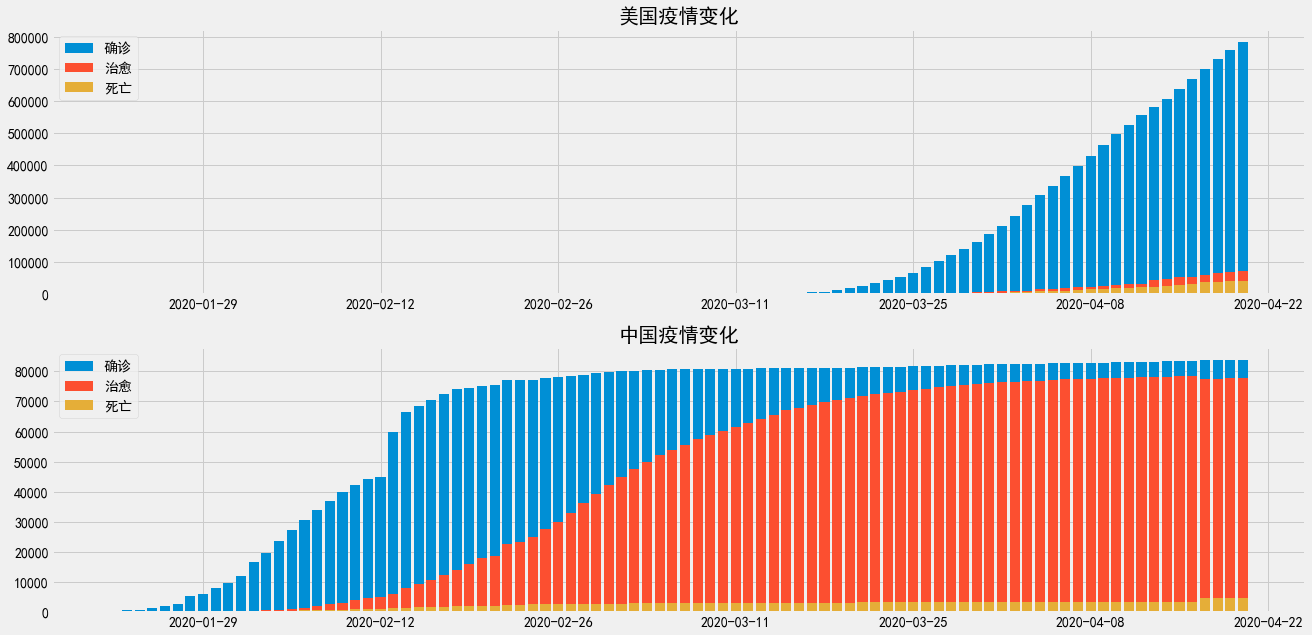

In [48]:
#数据随时间变化
plt.figure(figsize=(20,10))
ax=plt.subplot(2,1,1)
plt.bar(time,x)
plt.bar(time,y)
plt.bar(time,z)
plt.title('美国疫情变化')
plt.legend(('确诊','治愈','死亡'))

ax=plt.subplot(2,1,2)
plt.bar(time,ChinaConfirmSum)
plt.bar(time,ChinaRecoveredSum)
plt.bar(time,ChinaDeathSum)
plt.title('中国疫情变化')
plt.legend(('确诊','治愈','死亡'))
plt.show()

    从中美疫情对比中可以看出，美国发现较晚，但上升最为迅速，截止目前已经成为全球最大疫情国，死亡人数更是超过了4万，几乎是我国的10倍。同时治愈速度跟不上确诊人数增加的速度。

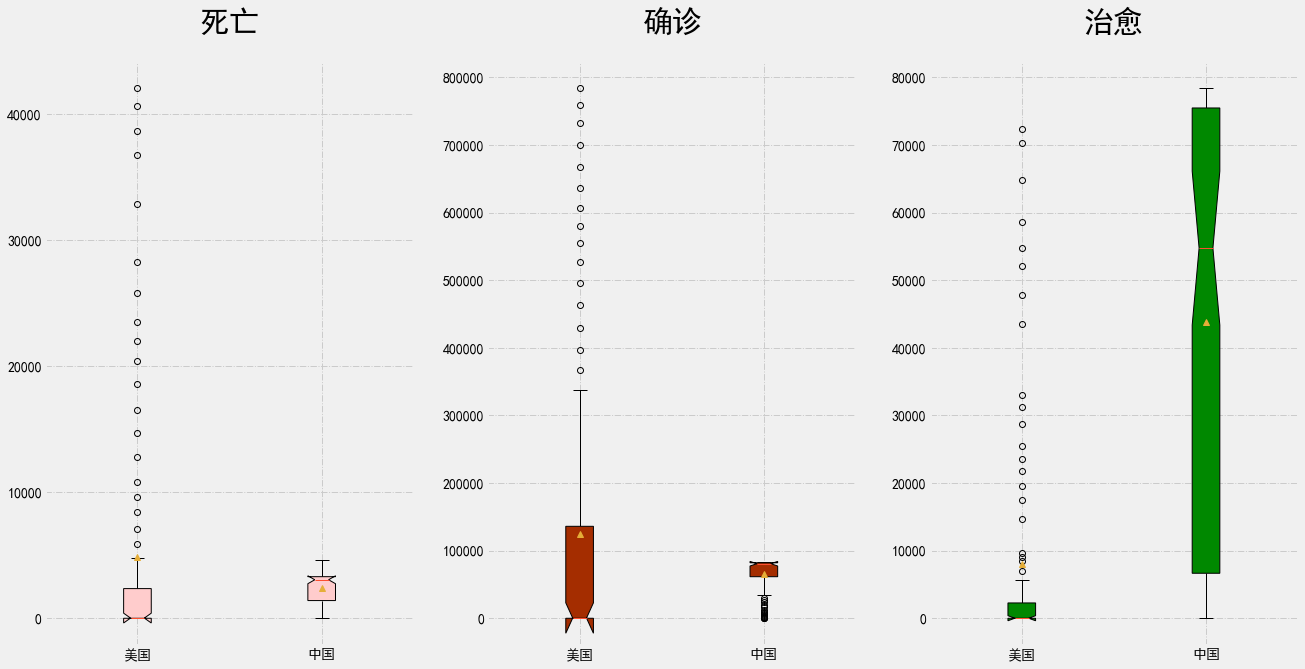

In [49]:
#中美各数据箱线图对比
plt.figure(figsize=(20,10))
ax=plt.subplot(1,3,1)
plt.boxplot([z,ChinaDeathSum],patch_artist=True,notch=True,labels=['美国','中国'],showmeans=True,boxprops = {'facecolor':np.random.choice(colors)})
plt.title('死亡',fontsize=30,pad=30)
plt.grid(linestyle = "-.")  # 生成网格

ax=plt.subplot(1,3,2)
plt.boxplot([x,ChinaConfirmSum],patch_artist=True,notch=True,labels=['美国','中国'],showmeans=True,boxprops = {'facecolor':np.random.choice(colors)})
plt.title('确诊',fontsize=30,pad=30)
plt.grid(linestyle = "-.")  # 生成网格

ax=plt.subplot(1,3,3)
plt.boxplot([y,ChinaRecoveredSum],patch_artist=True,notch=True,labels=['美国','中国'],showmeans=True,boxprops = {'facecolor':np.random.choice(colors)})
plt.title('治愈',fontsize=30,pad=30)
plt.grid(linestyle = "-.")  # 生成网格

    箱线图是一种用作显示一组数据分散情况资料的统计图，它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比较。箱子的中间一条线，是数据的中位数，代表了样本数据的平均水平；箱子的上下限，分别是数据的上四分位数和下四分位数。这意味着箱子包含了50%的数据；箱子的上方和下方，又各有一条线代表着最大最小值，三角形代表该组数据的平均值。

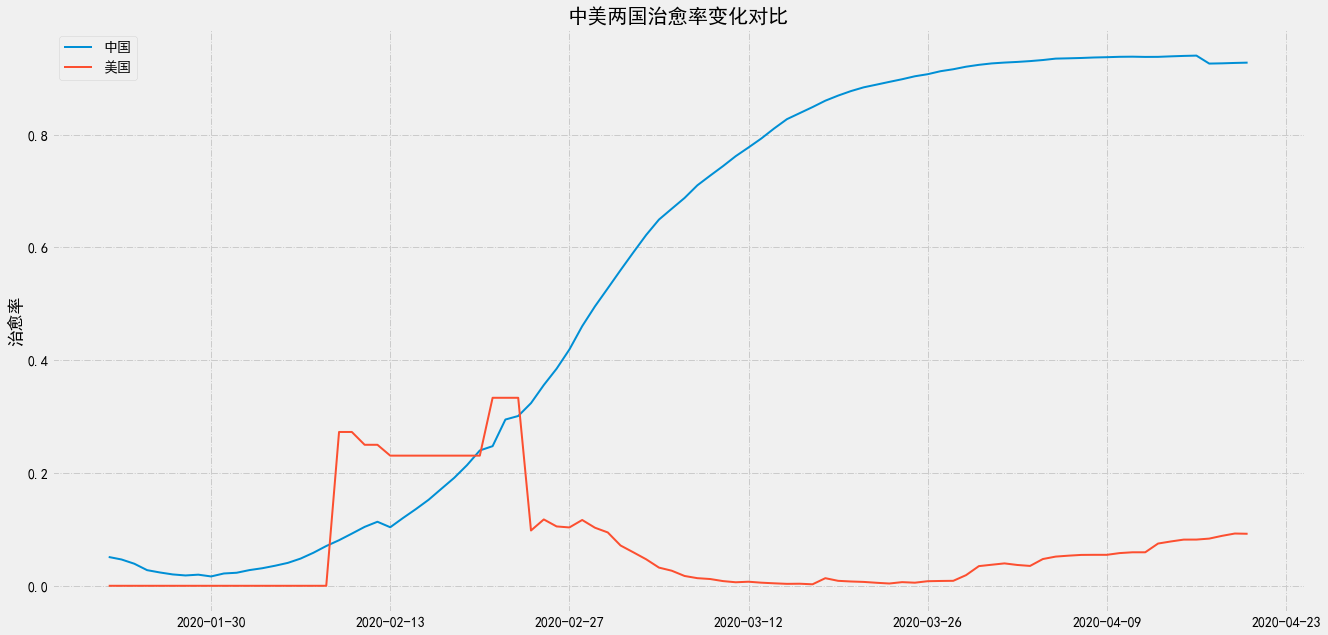

In [50]:
#中美两国治愈率变化对比
plt.figure(figsize=(20,10))
plt.plot(China['Time'],China['CureRate'],linewidth=2)
plt.plot(US['Time'],US['CureRate'],linewidth=2)
plt.title('中美两国治愈率变化对比')
plt.ylabel('治愈率')
plt.legend(('中国','美国'))
plt.grid(linestyle = "-.")
plt.show()

    治愈率对比上，我国呈总体上升趋势，在之后一直保持60%以上的治愈率，美国随着确诊数增加，治愈率始终保持在40%以下。